In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
plt.rcParams["figure.figsize"] = (12, 9)

## Vanishing & Exploding Gradient Problem

By gradient, we mean the gradient of the loss function with respect to the weights of the neural network. As you already learned, this gradient is calculated using backpropagation.  

* What you should know:
    * [Backpropagation](https://www.youtube.com/watch?v=tIeHLnjs5U8)
  
* Video for this topic:
    * [Vanishing & Exploding Gradient explained](https://www.youtube.com/watch?v=qO_NLVjD6zE)

### What happens during backpropagation?

Let's start with the loss function. In case we use an MSE loss (or cost) function it is calculated this way:

$ Loss = (a_{L} -y)^2 $

Where $ y $ denotes the desired output of the network and $a_{L}$ is the activation of the last neuron.


$ a_{L} = \sigma( w_{L}a_{L-1}+b_{L})$


Let's define $ in $ as the input of our network and 
write down a 5 layer network single neuron network:


$ a_{1} = \sigma( w_{1} in +b_{1}) $ 

$ a_{2} = \sigma( w_{2}a_{1}+b_{2}) $ 

$ a_{3} = \sigma( w_{3}a_{2}+b_{3}) $ 

$ a_{4} = \sigma( w_{4}a_{3}+b_{4}) $ 

$ a_{5} = \sigma( w_{5}a_{4}+b_{5}) $ 

$ Loss = (a_{5} -y)^2 $

With the help of the backpropagation algorithm, we can adjust the weights. As you know the backpropagation uses derivatives to calculate the weight changes. How do these derivatives look like?


### A close look at the derivative of our activation function

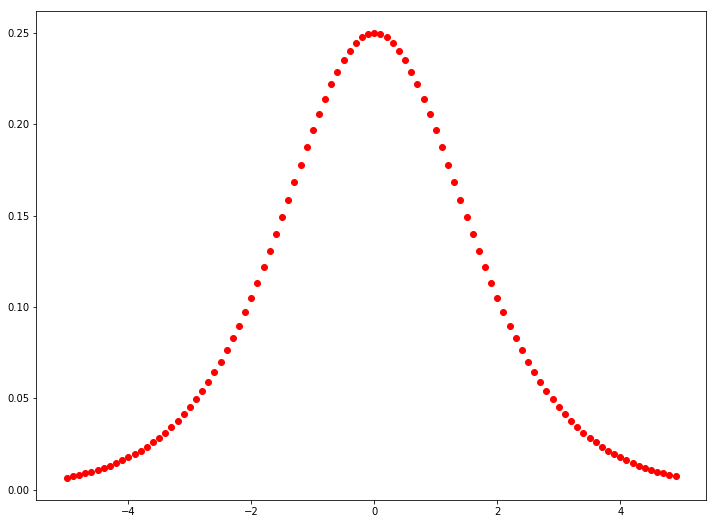

In [12]:
activationFunction = nn.Sigmoid() # try this for Sigmoid, Tanh, ReLU

for i in range(-50,50):
    data = torch.tensor([i/10],requires_grad=True)
    calc = activationFunction(data)
    calc.backward()    
    plt.plot(i/10,data.grad[0], 'ro')    

plt.show()

The maximum of the derivative of the sigmoid function is 0.25 at $x = 0$ and much smaller for all other values. 


### Let's implement a small network...
so we can see what's going on here. We use a 5 layer single neuron network that we defined earlier. 

Let's say our network should negate a number. If we put in a $1$ and it should return a $-1$. For simplicity, we do not use biases in this tiny example.

In [3]:
number_of_layers = 5
weight_tensor = torch.randn((1, number_of_layers), requires_grad=True)
weight = weight_tensor[0].abs() 
net_input = 1 
y = net_output = -1
weight

tensor([1.1797, 1.3934, 0.2839, 0.1575, 1.3092], grad_fn=<AbsBackward>)

In [4]:
layer = activationFunction(weight[0] * net_input) 

for i in range(1,number_of_layers):
    layer = activationFunction(weight[i] * layer)     
    
loss= (layer - y)**2

loss.backward()

In [5]:
# we can obtian the gradient of the weights with:
weight_tensor.grad

tensor([[1.2801e-04, 3.9076e-04, 7.0230e-03, 1.3398e-01, 3.8725e-01]])

From right to left, we can see how the weight delta gets smaller. Since they are a product of numbers smaller than one, they can only get even smaller.

In [6]:
learning_rate = 0.01
weight_neuron_one = weight_tensor[0][0].item()
weight_grad_neuron_one =  weight_tensor.grad[0][0].item()

weight_update = weight_grad_neuron_one * learning_rate

print("wieght update:\n")
print("weight delta \t\t* learning rate \t= update step")
print(f"{weight_grad_neuron_one:.16f} \t* {learning_rate} \t\t\t= {weight_update:.16f}")
print("")
print(f"old weight:{weight_neuron_one}")
print(f"new weight:{weight_neuron_one - weight_update}")

wieght update:

weight delta 		* learning rate 	= update step
0.0001280104479520 	* 0.01 			= 0.0000012801044795

old weight:1.1797258853912354
new weight:1.1797246052867558


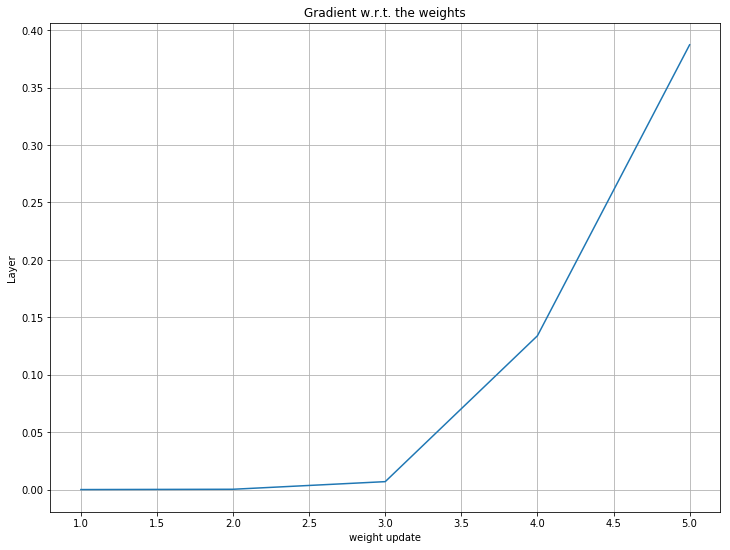

In [13]:
fig, ax = plt.subplots()
ax.plot(range(1,number_of_layers+1),weight_tensor.grad[0].numpy())

ax.set(xlabel='weight update', ylabel='Layer',
       title='Gradient w.r.t. the weights')
ax.grid()

plt.show()

As you can the gradient of our toy network quickly gets close to zero. That's why this problem is called vanishing gradient problem. Since the updates to the weights are so small, they also don't help to reduce the loss.

The opposite of this is called the exploding gradient, this happens if weights or activations.


## Tasks

1. Try different activation functions.
2. Increase the number of layers.
3. Modify the code so that the gradient explodes.